In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from profilehooks import profile, timecall

%matplotlib inline

In [2]:
#Reading data dsource csv
df = pd.read_csv('../cleaned_data.csv', index_col=0)

In [3]:
df.head()

,target,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
X = df.drop('target', axis=1)

In [5]:
y = df['target']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Learning by Random Forest

In [7]:
random_tree_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [15]:
random_tree_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting

In [9]:
y_pred = random_tree_model.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1277    0]
 [ 109 1052]]
              precision    recall  f1-score   support

           e       0.92      1.00      0.96      1277
           p       1.00      0.91      0.95      1161

   micro avg       0.96      0.96      0.96      2438
   macro avg       0.96      0.95      0.95      2438
weighted avg       0.96      0.96      0.96      2438



In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_tree_model, X, y, cv = 10)
print(scores)

[0.6199262  0.88314883 0.98646986 0.98523985 0.96432964 0.94710947
 1.         1.         0.99506782 0.99506782]


In [16]:
scores.mean()

0.937635949725712

# Experiments

## Max depth

In [47]:
cv_scores = []

for deph in range(1,23):
    random_tree_model = RandomForestClassifier(n_estimators=100, max_depth=deph, random_state=0)
    scores = cross_val_score(random_tree_model, X, y, cv=10)
    cv_scores.append(scores.mean())
    
print(cv_scores)

[0.8939044034497126, 0.937635949725712, 0.9439023391466961, 0.9504165510212438, 0.9574376310964097, 0.9584210342719951, 0.9670356703567036, 0.9683883805545823, 0.9685116851168513, 0.9683883805545823, 0.9685116851168513, 0.9683883805545823, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513]


ValueError: x and y must have same first dimension, but have shapes (22,) and (10,)

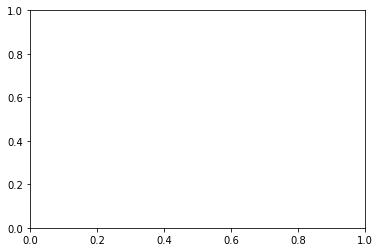

In [63]:
plt.plot(range(0,22), cv_scores)
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

With the depth of 9 the acurracy reaches its maximum of 0.9685116851168513

## Number of Trees
Now we will use the most acurrate tree depth of 9 to find the most acurrate number of trees

In [67]:
cv_scores = []

for n_estimators in range(10, 110, 10):
    random_tree_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=9, random_state=0)
    scores = cross_val_score(random_tree_model, X, y, cv=10)
    cv_scores.append(scores.mean())
    
print(cv_scores)

[0.9678966789667897, 0.9713407134071341, 0.9714631079726332, 0.9683883805545823, 0.9680184668677759, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513, 0.9685116851168513]


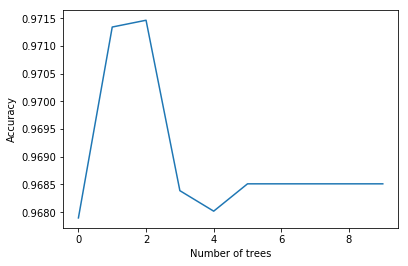

In [68]:
plt.plot(range(0,10), cv_scores)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

With the numbers of trees of 30 the acurracy reaches its maximun of 0.9714631079726332

# Performance Measurement

In [70]:
@profile(immediate=True)
def predict_ml():
    random_tree_model = RandomForestClassifier(n_estimators=30, max_depth=9, random_state=0)
    random_tree_model.fit(X_train,y_train)
    y_pred = random_tree_model.predict(X_test)
    
predict_ml()


*** PROFILER RESULTS ***
predict_ml (<ipython-input-70-2a74802b6bc3>:1)
function called 1 times

         48361 function calls (47928 primitive calls) in 0.543 seconds

   Ordered by: cumulative time, internal time, call count
   List reduced from 282 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.543    0.543 <ipython-input-70-2a74802b6bc3>:1(predict_ml)
        1    0.001    0.001    0.506    0.506 forest.py:220(fit)
       30    0.003    0.000    0.355    0.012 base.py:120(_make_estimator)
      150    0.016    0.000    0.307    0.002 base.py:166(get_params)
      150    0.015    0.000    0.278    0.002 base.py:139(_get_param_names)
      150    0.001    0.000    0.198    0.001 inspect.py:3068(signature)
      150    0.001    0.000    0.197    0.001 inspect.py:2816(from_callable)
      150    0.006    0.000    0.195    0.001 inspect.py:2191(_signature_from_callable)
      150    0.035    0.000 